In [149]:
# import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load Dataset
match = pd.read_csv("matches.csv")
delivery = pd.read_csv("deliveries.csv")

In [3]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
# Check the shape of the dataset
match.shape,delivery.shape

((756, 18), (179078, 21))

### We will Extract neccesary Features for our model from this both Dataset.
1. Batting Team
2. Bowling Team
3. City
4. Runs Left
5. Bowls Left
6. Wickets Left
7. Total Runs of First Team
8. crr 
9. rrr
10. result

In [6]:
# to extract particular inning wise total runs in every match 
total_runs_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
total_runs_df.head()

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183


In [7]:
# as we just want to extract first innings total score. so, we will drop second innings total score.
total_runs_df = total_runs_df[total_runs_df['inning']==1]
total_runs_df['target'] = total_runs_df['total_runs'] + 1
total_runs_df

,match_id,inning,total_runs,target
0,1,1,207,208
2,2,1,184,185
4,3,1,183,184
6,4,1,163,164
8,5,1,157,158
...,...,...,...,...
1518,11347,1,143,144
1520,11412,1,136,137
1522,11413,1,171,172
1524,11414,1,155,156


In [8]:
# now we will merge this total runs with our match dataframe
match_df = match.merge(total_runs_df[['match_id','target']],left_on='id',right_on='match_id')

now, we will do some Preprocessing on our data. if we look at the teams then there is a some teams like gujarat lions and rising pune super giants, that teams only played for 2 Years.right now,  they are deprecated from ipl. so, we will remove that teams matches from our dataset and we will also rename some older team names with their new names.

In [9]:
# let's see unique values in team
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [10]:
# Teams list we want to keep
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [11]:
# Replace teams's Older Name into team's new name
match_df = match_df.replace({'Deccan Chargers':'Sunrisers Hyderabad','Delhi Daredevils':'Delhi Capitals'})
delivery = delivery.replace({'Deccan Chargers':'Sunrisers Hyderabad','Delhi Daredevils':'Delhi Capitals'})

In [12]:
# Drop all matches of that teams which currently not a part of IPL.
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

delivery = delivery[delivery['batting_team'].isin(teams)]
delivery = delivery[delivery['bowling_team'].isin(teams)]

In [13]:
# check the shape of the data
match_df.shape

(641, 20)

Now, we will remove that matches in which Duckworth–Lewis method is applied.

In [14]:
# Extract all matches in which dl method is not applied
match_df = match_df[match_df['dl_applied'] == 0]

In [15]:
# Extract Usefull columns from this dataset and join it with delivery dataset
match_df = match_df[['id','city','winner','target']]
delivery_df = match_df.merge(delivery,left_on='id',right_on='match_id')

In [16]:
# Now, i only want to work on chase. so, i will only extract second inning matches
delivery_df = delivery_df[delivery_df['inning']==2]
delivery_df

,id,city,winner,target,match_id,inning,batting_team,bowling_team,over,ball,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,11415,2,Chennai Super Kings,Mumbai Indians,20,2,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,153,11415,2,Chennai Super Kings,Mumbai Indians,20,3,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,153,11415,2,Chennai Super Kings,Mumbai Indians,20,4,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,153,11415,2,Chennai Super Kings,Mumbai Indians,20,5,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [17]:
# Now, i want to calculate runs on every ball in particulat match.
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs']

In [18]:
delivery_df.head()

,id,city,winner,target,match_id,inning,batting_team,bowling_team,over,ball,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,...,0,0,0,4,0,4,NaN,NaN,NaN,7


In [19]:
# Now, we will create new column named runs left using total runs and current score
delivery_df['runs_left'] = delivery_df['target'] - delivery_df['current_score']

In [20]:
delivery_df.head()

,id,city,winner,target,match_id,inning,batting_team,bowling_team,over,ball,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,...,0,0,1,0,1,NaN,NaN,NaN,1,207
126,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,...,0,0,0,0,0,NaN,NaN,NaN,1,207
127,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,...,0,0,0,0,0,NaN,NaN,NaN,1,207
128,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,...,0,0,2,0,2,NaN,NaN,NaN,3,205
129,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,...,0,0,4,0,4,NaN,NaN,NaN,7,201


In [21]:
# Now, we will create new column balls left using over and ball column
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball']) 
delivery_df.head()

,id,city,winner,target,match_id,inning,batting_team,bowling_team,over,ball,...,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,...,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,...,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,...,0,4,0,4,NaN,NaN,NaN,7,201,115


In [22]:
# Now, we will create new column wickets left using Player Dismissed Column
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna(0)
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x==0 else 1)
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed']
delivery_df['wickets_left'] = 10 - wickets 
delivery_df.head(6)

,id,city,winner,target,match_id,inning,batting_team,bowling_team,over,ball,...,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
125,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,...,4,0,4,0,NaN,NaN,7,201,115,10
130,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,6,...,4,0,4,0,NaN,NaN,11,197,114,10


In [23]:
# Now, we will Create new Column current Run rate using current Run and overs played
delivery_df['crr'] = (delivery_df['current_score']*6) / (120 - delivery_df['balls_left'])
delivery_df.head()

,id,city,winner,target,match_id,inning,batting_team,bowling_team,over,ball,...,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr
125,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,...,0,1,0,NaN,NaN,1,207,119,10,6.0
126,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,...,0,0,0,NaN,NaN,1,207,118,10,3.0
127,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,...,0,0,0,NaN,NaN,1,207,117,10,2.0
128,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,...,0,2,0,NaN,NaN,3,205,116,10,4.5
129,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,...,0,4,0,NaN,NaN,7,201,115,10,8.4


In [24]:
# Now, we will create new Column required Run rate using Runs left and balls left
delivery_df['rrr'] = (delivery_df['runs_left']*6)/(delivery_df['balls_left'])
delivery_df.head()

,id,city,winner,target,match_id,inning,batting_team,bowling_team,over,ball,...,total_runs,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,...,1,0,NaN,NaN,1,207,119,10,6.0,10.436975
126,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,...,0,0,NaN,NaN,1,207,118,10,3.0,10.525424
127,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,...,0,0,NaN,NaN,1,207,117,10,2.0,10.615385
128,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,...,2,0,NaN,NaN,3,205,116,10,4.5,10.603448
129,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,...,4,0,NaN,NaN,7,201,115,10,8.4,10.486957


In [25]:
# function to check wheather batting team won or not
def check_winner(row):
    return 1 if row['winner'] == row['batting_team'] else 0

delivery_df['result'] = delivery_df.apply(check_winner,axis=1)

In [26]:
delivery_df.head()

,id,city,winner,target,match_id,inning,batting_team,bowling_team,over,ball,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,rrr,result
125,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,...,0,NaN,NaN,1,207,119,10,6.0,10.436975,0
126,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,...,0,NaN,NaN,1,207,118,10,3.0,10.525424,0
127,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,...,0,NaN,NaN,1,207,117,10,2.0,10.615385,0
128,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,...,0,NaN,NaN,3,205,116,10,4.5,10.603448,0
129,1,Hyderabad,Sunrisers Hyderabad,208,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,...,0,NaN,NaN,7,201,115,10,8.4,10.486957,0


In [27]:
# Let's Collect All Final Columns from our DataFrame 
final_df = delivery_df[['batting_team','bowling_team','city','target','current_score','runs_left','balls_left','wickets_left','crr','rrr','result']]

In [28]:
# Let's Shuffle our dataset
final_df = final_df.sample(final_df.shape[0])
final_df.sample()

,batting_team,bowling_team,city,target,current_score,runs_left,balls_left,wickets_left,crr,rrr,result
130217,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,156,137,19,8,5,7.339286,14.25,0


In [29]:
# Let's Check for null values in our final dataset
final_df.isnull().sum()

batting_team       0
bowling_team       0
city             832
target             0
current_score      0
runs_left          0
balls_left         0
wickets_left       0
crr                0
rrr                5
result             0
dtype: int64

In [30]:
# Drop Null values
final_df.dropna(inplace=True)

In [31]:
# we will only take that rows in which balls are not zero. because it is making infinity values in rrr and crr.
final_df = final_df[final_df['balls_left']!=0]

#### So, now our Dataset is Finaly Ready to make Model. Next we will Build Model to Calculate Probability for win.

In [32]:
# Extract X and y
X = final_df.drop('result',axis=1)
y = final_df['result']

In [33]:
# import Required Libraries
from sklearn.model_selection import train_test_split

# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [34]:
# Check the shape of our train and test data
X_train.shape,X_test.shape

((57073, 10), (14269, 10))

In [35]:
# Next, we will apply onehot encoding on our categoical columns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

# define column transformer for onehot encoding 
ctf = ColumnTransformer([
    ('OneHotEncoding',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough') 

In [36]:
# Now we will Create Pipeline and in that First Step would be OneHot Encoding and Second step would
# be Scaling and in third would be Model training
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Define Pipeline
pipe = Pipeline(steps=[
    ('one hot encoding',ctf),
    ('Scaling',StandardScaler()),
    ('model training',LogisticRegression())
])

In [37]:
# draw pipeline Diagram
from sklearn import set_config
set_config(display='diagram')

In [38]:
# Model Training
pipe.fit(X_train,y_train)

Pipeline(steps=[('one hot encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoding',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('Scaling', StandardScaler()),
                ('model training', LogisticRegression())])

In [39]:
# prediction on test data
pred = pipe.predict(X_test)

In [40]:
# accuracy score on test data
pipe.score(X_test,y_test)

0.8035601653935104

* Here, We will use Logistic Regression Model. Because, it is Binary Classification Problem and Logistic Regression Perform Very well On Binary Classification Problem.
* Here, Logistic Regression is giving us Accuracy around 80%. that is good but other models like RandomForest can give us better Accuracy than this. but still if We look at the Probability then Logistic Regression Giving us Very Good Probability than Other Models and as We Wanted to calculate Probability So, We will use LogisticRegression here.

In [42]:
pipe.predict_proba(X_test)[50]

array([0.60853061, 0.39146939])

In [ ]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    
    return temp_df,target

temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

In [147]:
# define Function to analyze specific match over wise probability of win and lose 
def match_progression(df,match_id,pipe):
    match = df[df['match_id']==match_id]
    match = match[match['ball'] == 6]
    temp_df = match[['batting_team','bowling_team','city','target','current_score','runs_left','balls_left','wickets_left','crr','rrr']]
    
    temp_df = temp_df[temp_df['balls_left']!=0]
    
    pred = pipe.predict_proba(temp_df)
    
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    temp_df['lose'] = np.round(pred.T[0]*100,1)
    temp_df['win'] = np.round(pred.T[1]*100,1)
    
    target = temp_df['target'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    
    runs.insert(0,target)
    
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    
    wickets_list = list(temp_df['wickets_left'])
    wickets = wickets_list[:]
    
    wickets_list.insert(0,10)
    
    temp_df['wickets_in_over'] = np.array(wickets_list[:-1]) - np.array(wickets)
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','current_score','runs_after_over','wickets_in_over','lose','win']]
    
    return temp_df,target

In [176]:
# result of function
temp_df,target = match_progression(delivery_df,67,pipe)
temp_df

Target- 209


,end_of_over,current_score,runs_after_over,wickets_in_over,lose,win
8798,1,8,8,0,94.7,5.3
8806,2,13,5,1,97.2,2.8
8812,3,25,12,0,95.7,4.3
8818,4,31,6,1,97.6,2.4
8824,5,50,19,0,94.4,5.6
8830,6,52,2,0,95.4,4.6
8836,7,57,5,0,95.5,4.5
8842,8,67,10,0,94.0,6.0
8849,9,75,8,0,93.0,7.0
8855,10,83,8,1,95.5,4.5


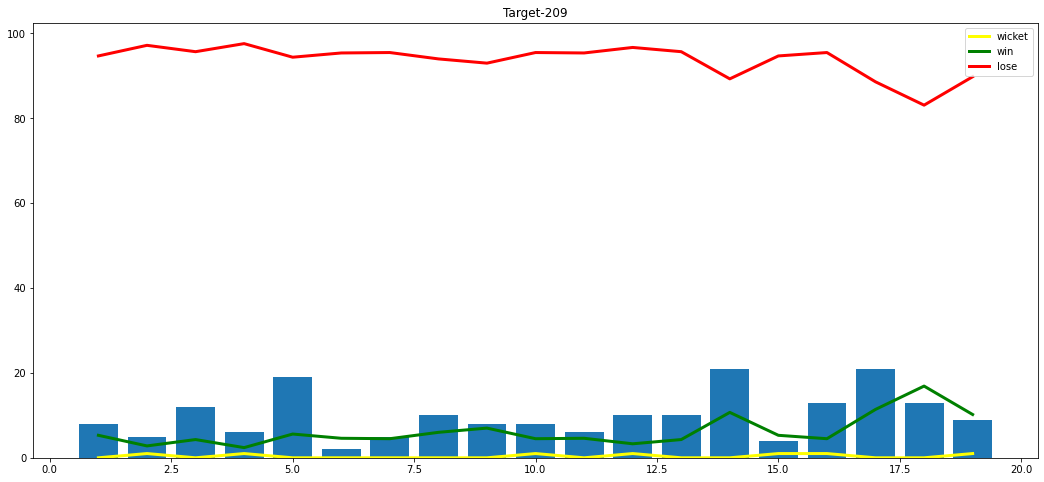

In [180]:
# Let's plot Graphs on this data
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3,label='wicket')
plt.plot(temp_df['end_of_over'],temp_df['win'],color='green',linewidth=3,label='win')
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=3,label='lose')
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-'+str(target))
plt.legend()
plt.show()

### So, Finaly Our Model is Ready. Now, We will Convert it into Website.

We will Need Three Things there.
* Team Names
* City Names
* Model

In [181]:
# Let's dump our model using Pickle
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [184]:
# We can get Team Names from here
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [188]:
# We can get City Names from here
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)